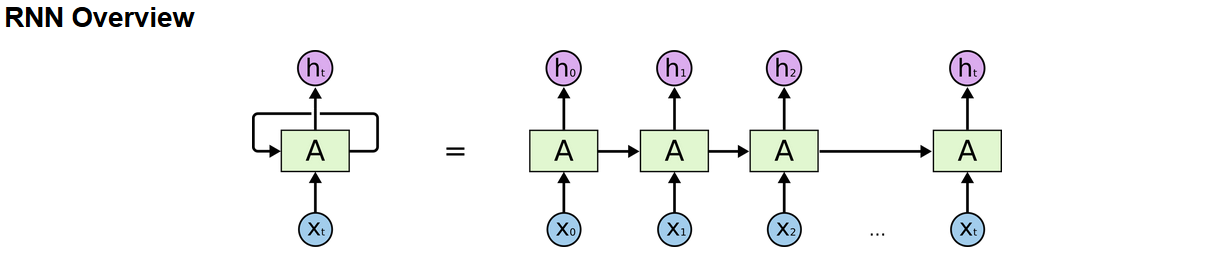

In [2]:
from __future__ import print_function

import tensorflow as tf
from tensorflow.contrib import rnn

In [3]:
# Import MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("../MNIST-data", False, one_hot=True)

Extracting ../MNIST-data/train-images-idx3-ubyte.gz
Extracting ../MNIST-data/train-labels-idx1-ubyte.gz
Extracting ../MNIST-data/t10k-images-idx3-ubyte.gz
Extracting ../MNIST-data/t10k-labels-idx1-ubyte.gz


In [4]:
# Training Parameters
learning_rate = 0.001
training_steps = 10000
batch_size = 128
display_step = 200

# Network Parameters
num_input = 28 # MNIST data input (img shape: 28*28)
timesteps = 28 # timesteps
num_hidden = 128 # hidden layer num of features
num_classes = 10 # MNIST total classes (0-9 digits)

# tf Graph input
X = tf.placeholder("float", [None, timesteps, num_input])
Y = tf.placeholder("float", [None, num_classes])

In [5]:
# Define weights
weights = {
    'out': tf.Variable(tf.random_normal([num_hidden, num_classes]))
}
biases = {
    'out': tf.Variable(tf.random_normal([num_classes]))
}

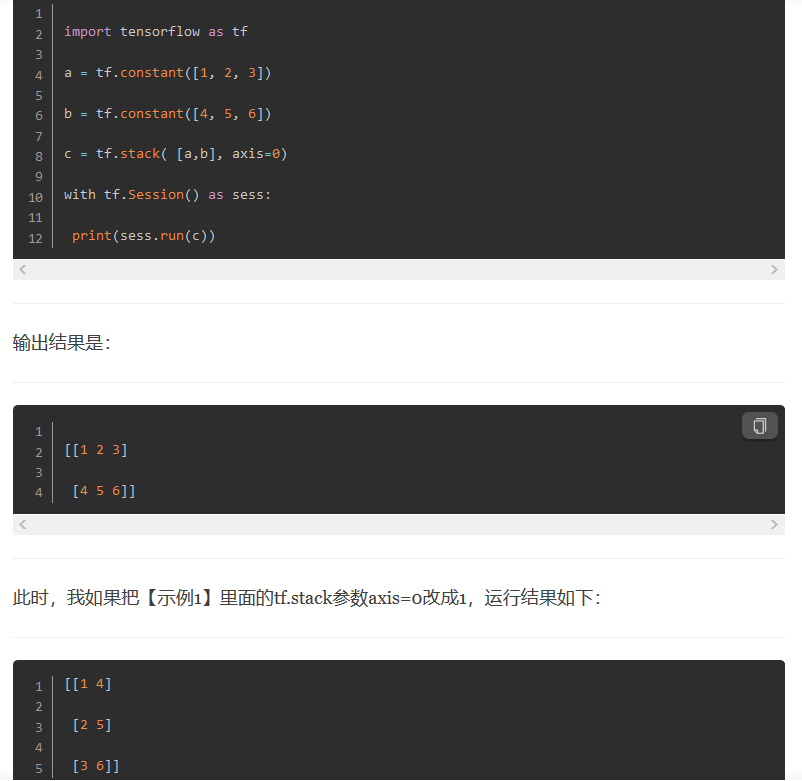
参考：https://www.jianshu.com/p/25706575f8d4

In [6]:
def RNN(x, weights, biases):

    # Prepare data shape to match `rnn` function requirements
    # Current data input shape: (batch_size, timesteps, n_input)
    # Required shape: 'timesteps' tensors list of shape (batch_size, n_input)

    # num：An int. The length of the dimension axis. Automatically inferred if None (the default). 
    x = tf.unstack(x, timesteps, 1)

    # Define a lstm cell with tensorflow
    lstm_cell = rnn.BasicLSTMCell(num_hidden, forget_bias=1.0)

    # Get lstm cell output
    # cell:用于神经网络的RNN神经元,如BasicRNNCell,BasicLSTMCell
    outputs, states = rnn.static_rnn(lstm_cell, x, dtype=tf.float32)

    # Linear activation, using rnn inner loop last output
    return tf.matmul(outputs[-1], weights['out']) + biases['out']

In [7]:
logits = RNN(X, weights, biases)
prediction = tf.nn.softmax(logits)

# Define loss and optimizer
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits,
                                                                 labels=Y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
train_op = optimizer.minimize(loss_op)

# Evaluate model (with test logits, for dropout to be disabled)
correct_pred = tf.equal(tf.argmax(prediction, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See tf.nn.softmax_cross_entropy_with_logits_v2.



In [8]:
# Start training
with tf.Session() as sess:
    # Run the initializer
    sess.run(init)

    for step in range(1, training_steps+1):
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        
        # Reshape data to get 28 seq of 28 elements
        batch_x = batch_x.reshape((batch_size, timesteps, num_input))
        
        # Run optimization op (backprop)
        sess.run(train_op, feed_dict={X: batch_x, Y: batch_y})
        if step % display_step == 0 or step == 1:
            # Calculate batch loss and accuracy
            loss, acc = sess.run([loss_op, accuracy],
                                 feed_dict={X: batch_x, Y: batch_y})
            print("Step " + str(step) + ", Minibatch Loss= " + \
                  "{:.4f}".format(loss) + ", Training Accuracy= " + \
                  "{:.3f}".format(acc))

    print("Optimization Finished!")

    # Calculate accuracy for 128 mnist test images
    test_len = 128
    test_data = mnist.test.images[:test_len].reshape((-1, timesteps, num_input))
    test_label = mnist.test.labels[:test_len]
    print("Testing Accuracy:", sess.run(accuracy,
                                        feed_dict={X: test_data, Y: test_label}))

Step 1, Minibatch Loss= 2.5076, Training Accuracy= 0.156
Step 200, Minibatch Loss= 2.1375, Training Accuracy= 0.250
Step 400, Minibatch Loss= 1.9312, Training Accuracy= 0.391
Step 600, Minibatch Loss= 1.6993, Training Accuracy= 0.500
Step 800, Minibatch Loss= 1.6627, Training Accuracy= 0.477
Step 1000, Minibatch Loss= 1.6059, Training Accuracy= 0.445
Step 1200, Minibatch Loss= 1.3635, Training Accuracy= 0.594
Step 1400, Minibatch Loss= 1.3077, Training Accuracy= 0.586
Step 1600, Minibatch Loss= 1.4541, Training Accuracy= 0.461
Step 1800, Minibatch Loss= 1.3123, Training Accuracy= 0.602
Step 2000, Minibatch Loss= 1.3148, Training Accuracy= 0.594
Step 2200, Minibatch Loss= 1.1857, Training Accuracy= 0.594
Step 2400, Minibatch Loss= 1.0699, Training Accuracy= 0.672
Step 2600, Minibatch Loss= 1.1409, Training Accuracy= 0.695
Step 2800, Minibatch Loss= 1.0642, Training Accuracy= 0.641
Step 3000, Minibatch Loss= 1.1001, Training Accuracy= 0.617
Step 3200, Minibatch Loss= 1.0904, Training Acc